In [1]:
import pandas as pd 
from test_retrieve import compute_metrics_from_df

## Precision and MAP Formulas

**Precision@k:**
P@k = (число релевантных документов в первых k результатах) / k

**Mean Average Precision (MAP):**
MAP = (1 / N) * Σ (P@i)
где:
   - N = общее число релевантных документов
   - P@i = Precision, вычисленный на каждой позиции i, где документ релевантен



## Retrieve metrics
До этого прогнали вопросы на ретрив до 10 для 75 заданных вопросов, получили линк+заголовок+контент документов, разметили второем, сюда загружаем разметку

In [2]:
df_vera = pd.read_excel("Vera_1-25.xlsx", index_col=0)
df_nikita = pd.read_excel("Nikita_51-75.xlsx", index_col=0)
df_vanya = pd.read_excel("Vanya_26-50.xlsx", index_col=0)
df = pd.concat([df_vera, df_vanya, df_nikita], axis=0).reset_index(drop=True)
df.head(5)

,question,link,title,page_content,is_link_relevant
0,Как работают нейронные сети?,https://habr.com/ru/post/258003/,Искусственный интеллект в Wolfram Language: пр...,"Итак, систему какого типа нам нужно использова...",1
1,Как работают нейронные сети?,https://habr.com/ru/post/324564/,Разработка R&D-;проектов продолжается: запуск ...,Много сил требует обработка нейронных сетей ка...,0
2,Как работают нейронные сети?,https://habr.com/ru/post/333492/,Использование нейронных сетей для распознавани...,"До сих пор мы использовали нейронные сети, в к...",1
3,Как работают нейронные сети?,https://habr.com/ru/post/715682/,[Научпоп с кодом] Что такое «жидкая» нейросеть...,Команда работает над улучшением архитектуры св...,0
4,Как работают нейронные сети?,https://habr.com/ru/post/419509/,Фотонная искусственная нейронная сеть,Фотонная искусственная нейронная сеть\nВ одной...,0


In [3]:
df.columns

Index(['question', 'link', 'title', 'page_content', 'is_link_relevant'], dtype='object')

Precision at k:
p@1: 0.6133
p@2: 0.7067
p@3: 0.8667
p@4: 0.9200
p@5: 0.9467
p@10: 0.9733
Mean Average Precision (MAP): 0.6429


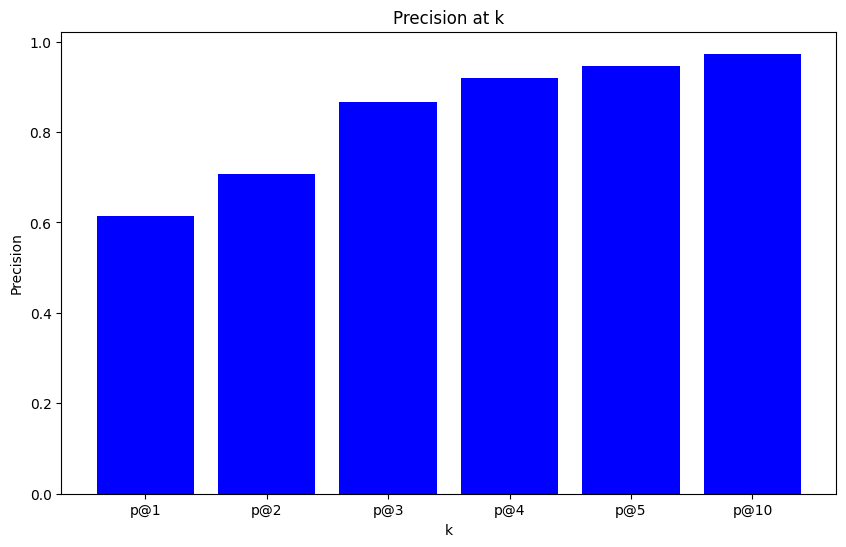

In [4]:
compute_metrics_from_df(df)

## Generation metrics
На тех же 75 вопросах подготовили генерации, разметили

In [5]:
data = pd.read_excel("generation_with_labels.xlsx", index_col=0)
data.head(5)

,answer,links,label
question,,,
Как работают нейронные сети?,Нейронные сети — это формальные вычислительные...,[{'title': 'Искусственный интеллект в Wolfram ...,1
Чем отличаются глубокие нейронные сети от обычных?,Глубокие нейронные сети отличаются от обычных ...,[{'title': 'Многообещающая нейронная сеть или ...,1
Как обучить нейронную сеть?,Обучение нейронной сети можно начать с односло...,[{'title': 'Метод безытеративного обучения одн...,2
Какие существуют методы оптимизации в машинном обучении?,В машинном обучении используются такие методы ...,[{'title': 'Книга «Глубокое обучение. Погружен...,2
Как работает метод обратного распространения ошибки?,Метод обратного распространения ошибки состоит...,[{'title': 'Алгоритм обучения многослойной ней...,2


In [6]:
mean_quality = data['label'].mean()
mean_quality

np.float64(1.5066666666666666)

In [7]:
mean_quality/2

np.float64(0.7533333333333333)